In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

GaussianDiscriminant class (univariate) is filled in discriminants.py file.

##### Create two numpy arrays (resting, stressed), where resting data has a mean of 60 and stdev. of 5 and stressed has a mean of 100 and stdev. of 5.

In [2]:
'''Create the numpy arrays'''
np.random.seed(0)
mu, sigma = 60, 5 # mean and standard deviation
resting = np.random.normal(mu, sigma, 10000)

mu, sigma = 100, 5 # mean and standard deviation
stressed = np.random.normal(mu, sigma, 10000)

In [3]:
from discriminants import GaussianDiscriminant

In [4]:
resting_model = GaussianDiscriminant()
stressed_model= GaussianDiscriminant()

##### Fit a uni-variate Gaussian to each array

In [5]:
resting_model.fit(resting)
stressed_model.fit(stressed)

In [6]:
# check for mu and sigma
print("Mu and sigma of resting data:", resting_model.params)

Mu and sigma of resting data: {'mu': np.float64(59.90783139920867), 'sigma': np.float64(4.937782840880604), 'prior': 0.5}


In [7]:
print("Mu and sigma of stressed data:", stressed_model.params)

Mu and sigma of stressed data: {'mu': np.float64(100.0549400293647), 'sigma': np.float64(4.96527340483715), 'prior': 0.5}


In [8]:
input_x = np.linspace(40, 120)

In [9]:
g_resting = np.array([resting_model.calc_discriminant(x) for x in input_x])
g_stressed = np.array([stressed_model.calc_discriminant(x) for x in input_x])

In [10]:
g_resting.shape

(50,)

##### Plot the resulting discriminant values for inputs (x) 40 to 120 and highlight the decision boundary (where they cross)

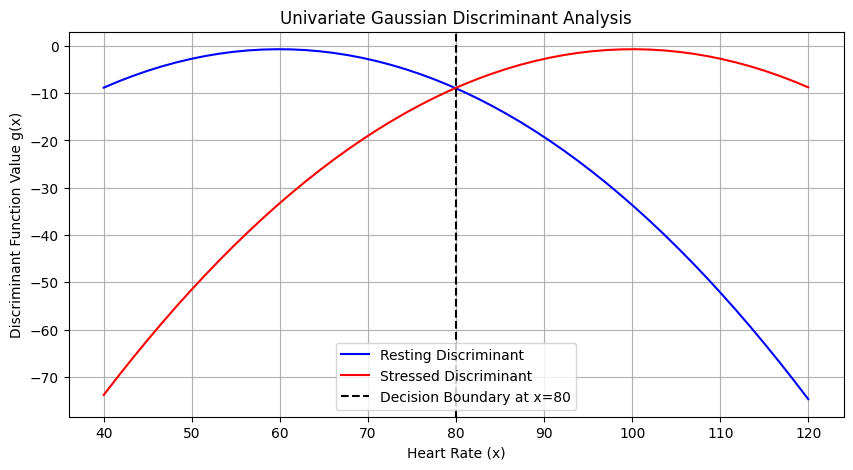

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(input_x, g_resting, label="Resting Discriminant", color='blue')
plt.plot(input_x, g_stressed, label="Stressed Discriminant", color='red')

plt.axvline(x=80, color='black', linestyle="--", label="Decision Boundary at x=80")

plt.xlabel("Heart Rate (x)")
plt.ylabel("Discriminant Function Value g(x)")
plt.title("Univariate Gaussian Discriminant Analysis")
plt.legend()
plt.grid()
plt.show()

#### Short Answer
##### 1. State why the two disciminants cross at 80 and why there is a parabolic shape to each discriminant plot

##### Why discriminant cross at 80 ?

The boundary crosses at 80 because that is where the classes are equally likely to occur. Decision boundary represents the point where 

$g_{\text{resting}}(x) = g_{\text{stressed}}(x)$

When we substitute the values of mu, sigma and prior in the discriminant function:

$-\frac{(x - 60)^2}{2\sigma^2} + \log P(\text{resting}) = -\frac{(x - 100)^2}{2\sigma^2} + \log P(\text{stressed})$

Since both classes have the same standard deviation ($\sigma = 5$) and equal priors ($P(\text{resting}) = P(\text{stressed})$), the equation simplifies to this:

$(x - 60)^2 = (x - 100)^2$

$x = \frac{\mu_{\text{resting}} + \mu_{\text{stressed}}}{2} = \frac{60 + 100}{2} = 80$

So, the decision boundary is only decided by the mu values (because and sigma and priors are equal for both resting and stressed)

##### Why there is a parabolic shape to each discriminant plot ?
The following term in the gaussian function 

$$
- \frac{(x - \mu)^2}{2\sigma^2}
$$

introduces a quadratic dependence on \( x \), leading to the parabolic shape.


### Question 2

##### MultivariateGaussian class is implemented in discriminants.py file

##### Create two numpy arrays (resting, stressed) that have two features each. µrest = [60, 10], Σrest = [[20, 100], [100, 20]]. µstress = [100, 80], Σstress = [[50, 20], [20, 50]]

In [12]:
mu_rest = [60, 10]
sigma_rest = [[100, 20], [20, 100]]

In [13]:
resting = np.random.multivariate_normal(mu_rest, sigma_rest, 10000)

In [14]:
mu_stress = [100, 80]
sigma_stress = [[50, 20], [20, 50]]

In [15]:
stressed = np.random.multivariate_normal(mu_stress, sigma_stress, 10000)

##### Fit a multivariate gaussian discriminant to each array

In [16]:
from discriminants import MultivariateGaussian

In [17]:
resting_multivar = MultivariateGaussian()
stressed_multivar = MultivariateGaussian()

In [18]:
resting_multivar.fit(resting)
stressed_multivar.fit(stressed)

##### Plot the resulting discriminant values for inputs (x) [20,20] to [120,120] and highlight the decision boundary (where they cross)

In [19]:
x1 = np.linspace(20, 120, 100)
x2 = np.linspace(20, 120, 100)
X1, X2 = np.meshgrid(x1, x2)
grid_points = np.c_[X1.ravel(), X2.ravel()]

C:\Users\chari\AppData\Local\Temp\ipykernel_27688\4026740491.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contour.collections:


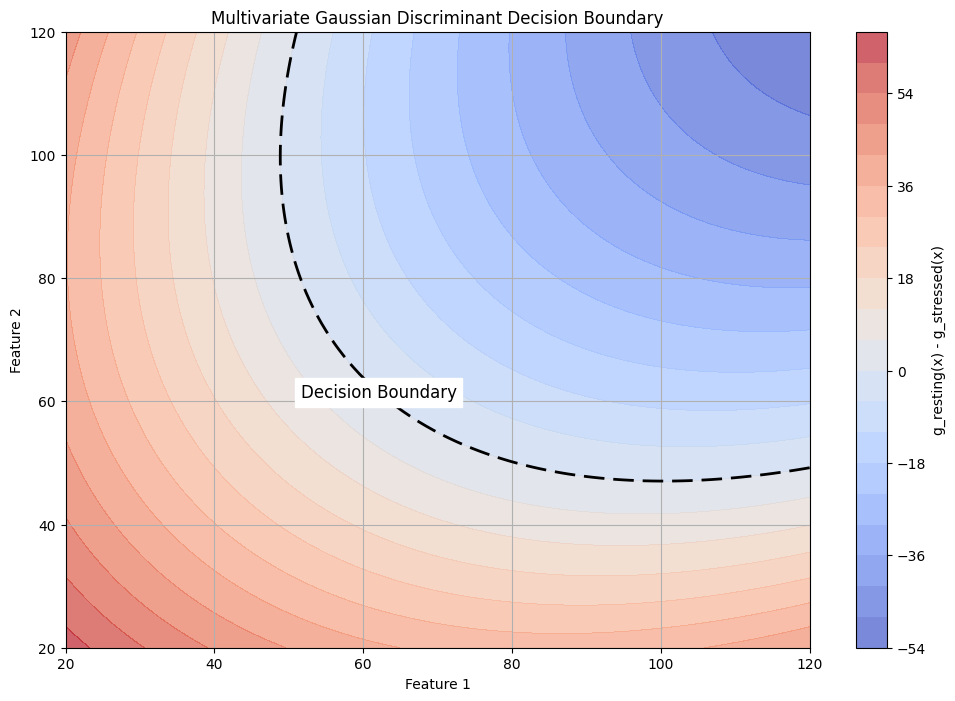

In [22]:
g_resting = np.array([resting_multivar.calc_discriminant(x) for x in grid_points]).reshape(X1.shape)
g_stressed = np.array([stressed_multivar.calc_discriminant(x) for x in grid_points]).reshape(X1.shape)

plt.figure(figsize=(12, 8))
plt.contourf(X1, X2, g_resting - g_stressed, levels=20, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="g_resting(x) - g_stressed(x)")
contour = plt.contour(X1, X2, g_resting - g_stressed, levels=[0], colors="black", linewidths=2, linestyles="--")
for c in contour.collections:
    for path in c.get_paths():
        verts = path.vertices
        mid_idx = len(verts) // 2  
        x_mid, y_mid = verts[mid_idx]
        plt.text(x_mid, y_mid, "Decision Boundary", fontsize=12, color="black",
                 verticalalignment='center', horizontalalignment='center', backgroundcolor='white')
        break
        
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Multivariate Gaussian Discriminant Decision Boundary")
plt.grid()
plt.show()

### Question 3

##### Using the multivariate discriminants you created in problem 2, plot the decisions the discriminant classifier outputs for inputs (x) [20,20] to [120,120]. You should see similar boundaries to problem 2.

In [23]:
from classifiers1 import DiscriminantClassifier

In [24]:
from discriminants import MultivariateGaussian

In [25]:
# create a dataframe from resting and stressed to fit the model
df_resting = pd.DataFrame(resting, columns=["Feature1", "Feature2"])
df_resting["Labels"] = "Resting"

df_stressed = pd.DataFrame(stressed, columns=["Feature1", "Feature2"])
df_stressed["Labels"] = "Stressed"

In [26]:
df = pd.concat([df_resting, df_stressed], ignore_index=True)
print(df.head(-5))

         Feature1   Feature2    Labels
0       57.446511   7.440440   Resting
1       50.954640   6.371163   Resting
2       78.633503  30.157482   Resting
3       49.933941   7.550236   Resting
4       67.671416  15.732050   Resting
...           ...        ...       ...
19990   97.433400  91.739240  Stressed
19991  100.040529  80.422671  Stressed
19992  104.808620  81.146599  Stressed
19993  103.864115  82.950791  Stressed
19994   99.282251  78.624938  Stressed

[19995 rows x 3 columns]


In [27]:
classifier1 = DiscriminantClassifier()
classifier1.fit(df, label_key = "Labels", default_disc = MultivariateGaussian)

In [28]:
print(classifier1.classes)

{'Resting': <discriminants.MultivariateGaussian object at 0x0000027FB5FB2330>, 'Stressed': <discriminants.MultivariateGaussian object at 0x0000027FB6163530>}


In [29]:
for class_name, disc in classifier1.classes.items():
    print(f"Class: {class_name}")
    print("Model Parameters:", disc.params)
    print("-" * 40)

Class: Resting
Model Parameters: {'mu': array([60.05545799, 10.02036049]), 'sigma': array([[102.59227647,  20.38960511],
       [ 20.38960511,  98.71527757]]), 'prior': 0.5}
----------------------------------------
Class: Stressed
Model Parameters: {'mu': array([99.99961745, 80.02911281]), 'sigma': array([[49.82042664, 20.3909107 ],
       [20.3909107 , 50.12352538]]), 'prior': 0.5}
----------------------------------------


In [30]:
x_min, x_max = 20, 120
y_min, y_max = 20, 120
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[X.ravel(), Y.ravel()]

In [31]:
class_mapping = {"Resting": 0, "Stressed": 1}
predictions_numeric = np.array([class_mapping[classifier1.predict(point)] for point in grid_points]).reshape(X.shape)

In [32]:
print(predictions_numeric[:10])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

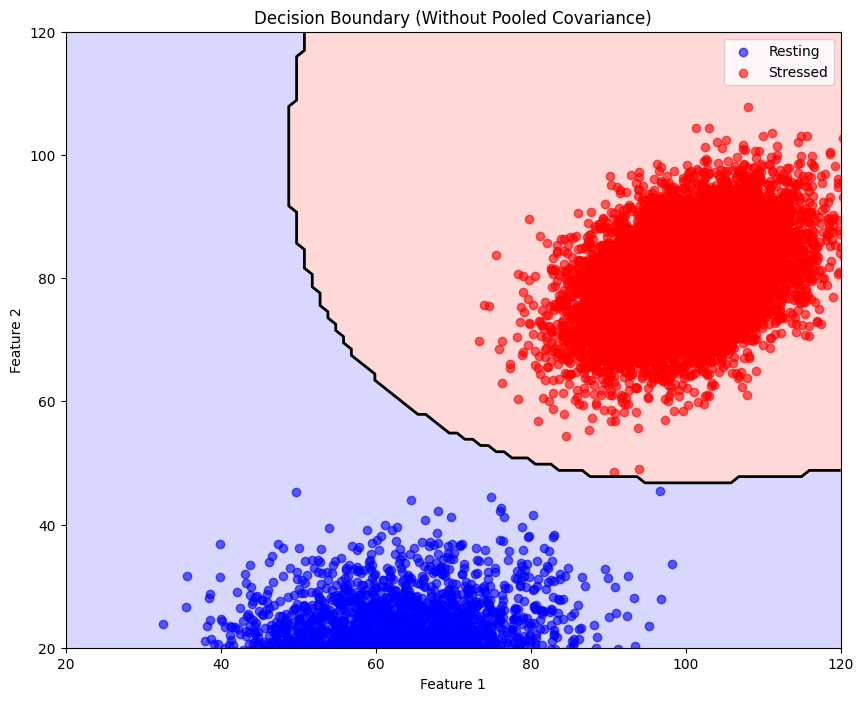

In [33]:
plt.figure(figsize=(10, 8))

contour = plt.contourf(X, Y, predictions_numeric, alpha=0.3, levels=1, cmap=plt.cm.bwr)

# Decision boundary
boundary = plt.contour(X, Y, predictions_numeric, levels=[0.5], colors='black', linewidths=2)

# Scatter plot of data points
plt.scatter(resting[:, 0], resting[:, 1], label="Resting", alpha=0.6, color='blue')
plt.scatter(stressed[:, 0], stressed[:, 1], label="Stressed", alpha=0.6, color='red')

# Labels and title
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Without Pooled Covariance)")

# Setting y-axis limits
plt.ylim(20, 120)
plt.xlim(20, 120)

plt.show()

##### Is your code usable for more than 2 classes?

In [34]:
mu_cat = [60, 10]
sigma_cat = [[100, 20], [20, 100]]
mu_dog = [100, 50]
sigma_dog = [[50, 20], [20, 50]]
mu_horse = [80, 20]
sigma_horse = [[20, 10], [10, 20]]

In [35]:
cat_weight = np.random.multivariate_normal(mu_cat, sigma_cat, 200)
dog_weight = np.random.multivariate_normal(mu_dog, sigma_dog, 200)
horse_weight = np.random.multivariate_normal(mu_horse, sigma_horse, 200)

In [36]:
# create a dataframe from resting and stressed to fit the model
df_cat = pd.DataFrame(cat_weight, columns=["Feature1", "Feature2"])
df_cat["Labels"] = "Cat"

df_dog = pd.DataFrame(dog_weight, columns=["Feature1", "Feature2"])
df_dog["Labels"] = "Dog"

df_horse = pd.DataFrame(horse_weight, columns=["Feature1", "Feature2"])
df_horse["Labels"] = "Horse"

In [37]:
df_2 = pd.concat([df_cat, df_dog, df_horse], ignore_index=True)
print(df_2.head(-5))

      Feature1   Feature2 Labels
0    73.674634  13.020391    Cat
1    57.493410  16.500532    Cat
2    47.801990  13.742637    Cat
3    68.507659  22.621589    Cat
4    61.924320   3.267818    Cat
..         ...        ...    ...
590  79.715130  20.745140  Horse
591  82.098672  17.146700  Horse
592  78.108163  16.527246  Horse
593  78.925296  25.755666  Horse
594  79.054100  12.034926  Horse

[595 rows x 3 columns]


In [38]:
classifier2 = DiscriminantClassifier()
classifier2.fit(df_2, label_key = "Labels", default_disc = MultivariateGaussian)

In [39]:
for class_name, disc in classifier2.classes.items():
    print(f"Class: {class_name}")
    print("Model Parameters:", disc.params)
    print("-" * 40)

Class: Cat
Model Parameters: {'mu': array([60.79090027, 10.09257137]), 'sigma': array([[109.83244986,  33.46841574],
       [ 33.46841574, 101.87301053]]), 'prior': 0.3333333333333333}
----------------------------------------
Class: Dog
Model Parameters: {'mu': array([99.93028128, 49.25336841]), 'sigma': array([[46.98299104,  9.7611621 ],
       [ 9.7611621 , 45.43037945]]), 'prior': 0.3333333333333333}
----------------------------------------
Class: Horse
Model Parameters: {'mu': array([79.90568553, 19.99686832]), 'sigma': array([[20.88586963, 11.79932941],
       [11.79932941, 20.94682481]]), 'prior': 0.3333333333333333}
----------------------------------------


In [40]:
predictions = np.array([classifier2.predict(x) for x in grid_points])
predictions = predictions.reshape(X.shape)

In [41]:
predictions

array([['Cat', 'Cat', 'Cat', ..., 'Cat', 'Cat', 'Cat'],
       ['Cat', 'Cat', 'Cat', ..., 'Dog', 'Dog', 'Dog'],
       ['Cat', 'Cat', 'Cat', ..., 'Dog', 'Dog', 'Dog'],
       ...,
       ['Cat', 'Cat', 'Cat', ..., 'Dog', 'Dog', 'Dog'],
       ['Cat', 'Cat', 'Cat', ..., 'Dog', 'Dog', 'Dog'],
       ['Cat', 'Cat', 'Cat', ..., 'Dog', 'Dog', 'Dog']], dtype='<U5')

In [42]:
np.unique(predictions)

array(['Cat', 'Dog', 'Horse'], dtype='<U5')

The implemented DiscriminantClassifier is reusable for more than two classes. 

##### How do you pool variances together? Hint: look at lecture slides

The pooled variance formula is:

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

It is simply a weighted average of the sample variances, where each variance is weighted by its degrees of freedom 

For multiple classes, the pooled variance becomes:
$$
s_p^2 = \frac{\sum (n_i - 1)s_i^2}{\sum (n_i - 1)}
$$

##### Now we need to connect theory to our implementation. First, create a pooled covariance matrix (shared class covariance), replot your decisions and briefly discuss how the boundary changed.

In [43]:
classifier1.pool_variances()

In [44]:
x_min, x_max = 20, 120
y_min, y_max = 20, 120
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[X.ravel(), Y.ravel()]

In [45]:
predictions_numeric = np.array([class_mapping[classifier1.predict(point)] for point in grid_points]).reshape(X.shape)

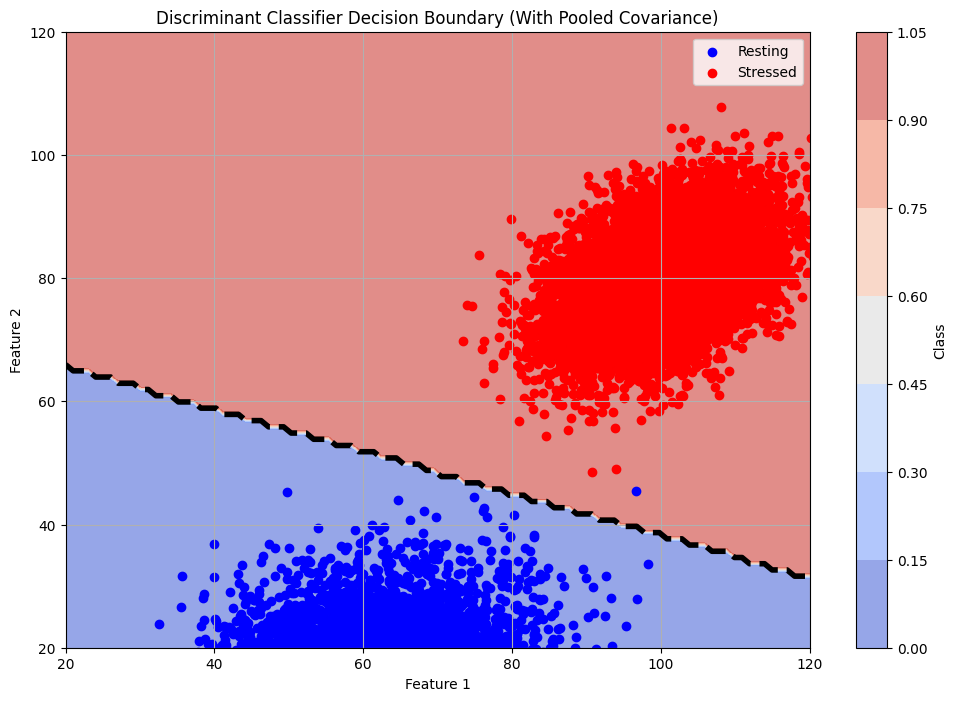

In [46]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, predictions_numeric, alpha=0.6, cmap=plt.cm.coolwarm)
plt.colorbar(label="Class")

# decision boundary
plt.contour(X, Y, predictions_numeric, levels=[0.5], colors="black", linewidths=4, linestyles="--")

# Scatter plot of data points
plt.scatter(resting[:, 0], resting[:, 1], label="Resting",  color='blue')
plt.scatter(stressed[:, 0], stressed[:, 1], label="Stressed",  color='red')

# Labels and title
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Discriminant Classifier Decision Boundary (With Pooled Covariance)")
plt.ylim(20, 120)  
plt.xlim(20, 120)
plt.grid()
plt.show()

##### Observation:

Without pooled covariance, each class has different covariance matrices. So the decsision boundary was non-linear.
In case of pooled covariance, as each class has the same covariance matrix, the decision boundary tends to become linear. Since all the classes are assumed to have same spread or variance, the decision boundary becomes linear and more symmetrical

##### Next, (still using the pooled covariance matrix) change the priors of a class and see what happens to the decision plots.

In [47]:
# Creating gaussian discs with different priors
resting_chprior = MultivariateGaussian(resting, prior=0.99, name="Resting")
stressed_chprior = MultivariateGaussian(stressed, prior=0.01, name="Stressed")

In [48]:
classifier3 = DiscriminantClassifier()
classifier3.set_classes(resting_chprior, stressed_chprior)

In [49]:
classifier3.pool_variances()

In [50]:
x_min, x_max = 20, 120
y_min, y_max = 20, 120
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[X.ravel(), Y.ravel()]

In [51]:
predictions_numeric = np.array([class_mapping[classifier3.predict(point)] for point in grid_points]).reshape(X.shape)

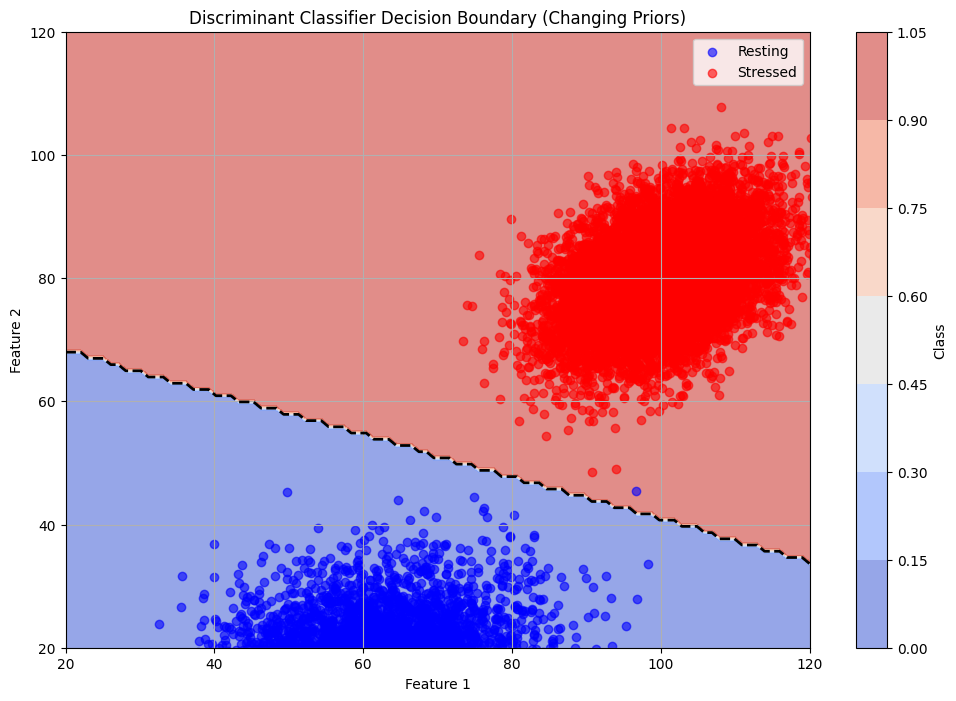

In [52]:
plt.figure(figsize=(12,8))
plt.contourf(X, Y, predictions_numeric, alpha=0.6, cmap="coolwarm") 
plt.colorbar(label="Class")

# **Adding Decision Boundary** – Contour line at class boundary
plt.contour(X, Y, predictions_numeric, levels=[0.5], colors="black", linewidths=2, linestyles="--")

# Scatter plot of data points
plt.scatter(resting[:, 0], resting[:, 1], label="Resting", alpha=0.6, color='blue')
plt.scatter(stressed[:, 0], stressed[:, 1], label="Stressed", alpha=0.6, color='red')

# Labels and title
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Discriminant Classifier Decision Boundary (Changing Priors)")
plt.ylim(20, 120)  
plt.xlim(20, 120)
plt.grid()
plt.show()

##### Observation:

When there were equal priors, both the classes were equally likely to occur. So the decision boundary is only influenced by likelihoods and covariances. <br>
When the prior values of classes are changed, there is a small drift in the decision boundary. In the above case, since "Resting" has the highest prior(0.99), the decision boundary slightly moved toward the "Stressed". Now, the classifier is more likely to predict "Resting" for regions closer to it and "Stressed" for regions where the prior is less influential.

#### 1. Explain why we assume I.I.D. for Maximum Likelihood Estimation (MLE)

For Maximum Likelihood estimation, we assume that the data points are independent and identically distributed :<br>
Maximum Likelihood Estimation aims to find the parameters that maximizes the likelihood of the observed data. 
Each data point is assumed to be independent of each other. That means that the probability of an observation does not impact the other. This simplifies the likelihood function as a product of individual probabilities. So, the log probability is simply the sum of individual log probabilities. This makes MLE computation feasible, as it avoids dealing with complex dependencies.
$$
P(x_1, x_2, ..., x_n | \theta) = \prod_{i=1}^{n} P(x_i | \theta)
$$

$$
\log L(\theta) = \sum_{i=1}^{n} \log P(x_i | \theta)
$$


We also assume that the data is drawn from same probability distribution to allow consistent estimation of parameters. The likelihood function will perform proper approximation of the true parameter when all observations follow a similar distribution.
Without such an assumption, under non-uniformity, MLE might converge to incorrect values <br>

Also, in statistics, many estimations rely on IID to ensure consistency and efficiency.

#### 2. Prove that the MLE for a Bernoulli Distribution is $$ p_0 = \frac{\sum_{i=1}^{N} x_i}{N} $$
For a dataset $$ X = {x_1, x_2, ..., x_N} $$ The Bernoulli distribution is defined as:
$$ P(X) = p_0^{x_i} (1 - p_0)^{1 - x_i}, \quad x_i \in \{0,1\} $$

The Likelihood function is the product of individual probabilities of all observations:
$$ L(p_0 | X) = \prod_{i=1}^{N} p_0^{x_i} (1 - p_0)^{1 - x_i} $$

Taking the **log** on both sides (product becomes sum):

$$ \log L(p_0 | X) = \sum_{i=1}^{N} x_i \log p_0 + \sum_{i=1}^{N} (1 - x_i) \log (1 - p_0) $$

To find the MLE, take the partial derivative with respect to \( p_0 \):

$$ \frac{\partial}{\partial p_0} \log L(p_0) = \frac{\sum_{i=1}^{N} x_i}{p_0} - \frac{N - \sum_{i=1}^{N} x_i}{1 - p_0} $$

Equating the derivative to zero:

$$ \frac{\sum_{i=1}^{N} x_i}{p_0} = \frac{N - \sum_{i=1}^{N} x_i}{1 - p_0} $$

Solving for \( p_{0} \):

$$ \sum_{i=1}^{N} x_i (1 - p_0) = (N - \sum_{i=1}^{N} x_i) p_0 $$

$$ \sum_{i=1}^{N} x_i - \sum_{i=1}^{N} x_i p_0 = N p_0 - \sum_{i=1}^{N} x_i p_0 $$

$$ \sum_{i=1}^{N} x_i = N p_0 $$

$$ p_0 = \frac{\sum_{i=1}^{N} x_i}{N} $$

Thus, the MLE for \( p_0 \) in a Bernoulli distribution is the sample mean.

$$ p_0 = \frac{\sum_{i=1}^{N} x_i}{N} $$

---

### 3. Maximum Likelihood Estimation for a Bernoulli Distribution with Balls


The probability of drawing a green ball follows a Bernoulli distribution with parameter:

$$
p = \frac{\Theta}{3}
$$

Given the observed samples:

$$
x_1 = 1, \quad x_2 = 0, \quad x_3 = 0, \quad x_4 = 1
$$

The joint probability is:

$$
P(x_1, x_2, x_3, x_4 | \Theta) = \prod_{i=1}^{4} P(x_i | \Theta)
$$

Bernoulli distribution:

$$
P(x_i | \Theta) = \left( \frac{\Theta}{3} \right)^{x_i} \left( 1 - \frac{\Theta}{3} \right)^{1 - x_i}
$$


$$
P(x_1, x_2, x_3, x_4 | \Theta) = \left( \frac{\Theta}{3} \right)^1 \left( 1 - \frac{\Theta}{3} \right)^0 \times 
\left( \frac{\Theta}{3} \right)^0 \left( 1 - \frac{\Theta}{3} \right)^1 \times
\left( \frac{\Theta}{3} \right)^0 \left( 1 - \frac{\Theta}{3} \right)^1 \times
\left( \frac{\Theta}{3} \right)^1 \left( 1 - \frac{\Theta}{3} \right)^0
$$


$$
P(x_1, x_2, x_3, x_4 | \Theta) = \left( \frac{\Theta}{3} \right)^2 \left( 1 - \frac{\Theta}{3} \right)^2
$$


##### For Theta = 0 :

$$
P(x_1, x_2, x_3, x_4 | 0) = \left( \frac{0}{3} \right)^2 \left( 1 - \frac{0}{3} \right)^2 = 0
$$

##### For Theta = 1 :

$$
P(x_1, x_2, x_3, x_4 | 1) = \left( \frac{1}{3} \right)^2 \left( 1 - \frac{1}{3} \right)^2 = \frac{4}{81}
$$

##### For Theta = 2:

$$
P(x_1, x_2, x_3, x_4 | 2) = \left( \frac{2}{3} \right)^2 \left( 1 - \frac{2}{3} \right)^2 = \frac{4}{81}
$$

##### For Theta = 3:

$$
P(x_1, x_2, x_3, x_4 | 3) = \left( 1 \right)^2 \left( 1 - 1 \right)^2 = 0
$$

##### Summary Table

$$
\begin{array}{|c|c|}
\hline
\Theta & P(x_1, x_2, x_3, x_4 | \Theta) \\
\hline
0 & 0 \\
1 & \frac{4}{81} \\
2 & \frac{4}{81} \\
3 & 0 \\
\hline
\end{array}
$$



